# CODE TO CLASSIFY TRAFFIC SIGNS

Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.

@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}



- ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
- ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
- ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
- ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
- ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
- (10, b'No passing for vehicles over 3.5 metric tons')
- (11, b'Right-of-way at the next intersection') (12, b'Priority road')
- (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
- (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
- (18, b'General caution') (19, b'Dangerous curve to the left')
- (20, b'Dangerous curve to the right') (21, b'Double curve')
- (22, b'Bumpy road') (23, b'Slippery road')
- (24, b'Road narrows on the right') (25, b'Road work')
- (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
- (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
- (31, b'Wild animals crossing')
- (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
- (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
- (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
- (40, b'Roundabout mandatory') (41, b'End of no passing')
- (42, b'End of no passing by vehicles over 3.5 metric tons')


In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
# import libraries
import pickle

import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random


In [10]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [11]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [12]:
X_train.shape

(34799, 32, 32, 3)

In [13]:
y_train.shape

(34799,)

# IMAGE EXPLORATION

36

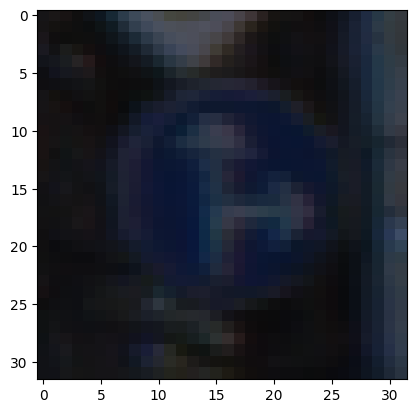

In [14]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

# DATA PEPARATION

In [15]:
## Shuffle the dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [16]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True)

In [17]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


In [18]:
X_train_gray.shape

(34799, 32, 32, 1)

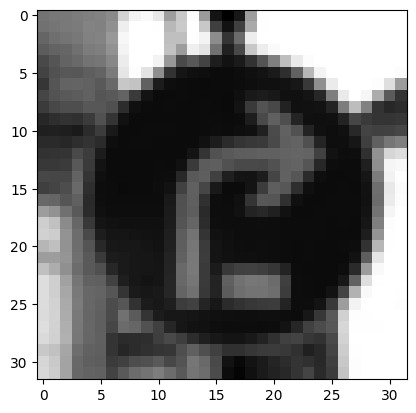

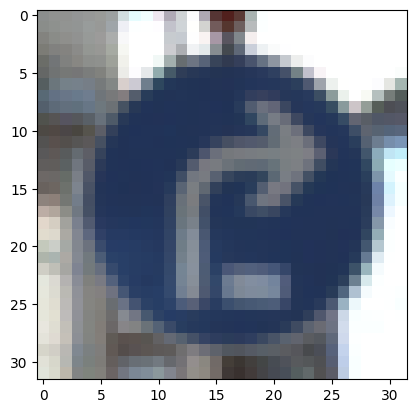

In [19]:
i = 721
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


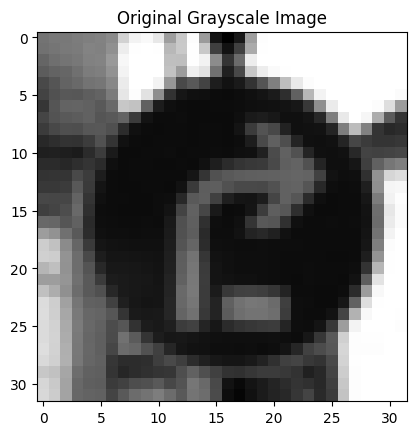

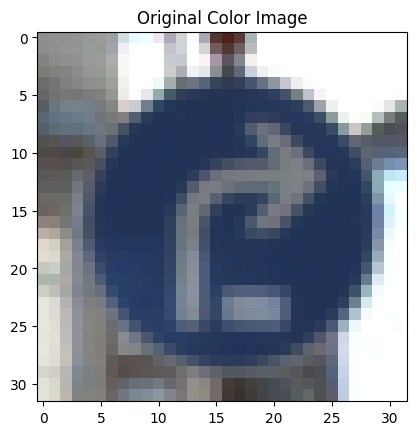

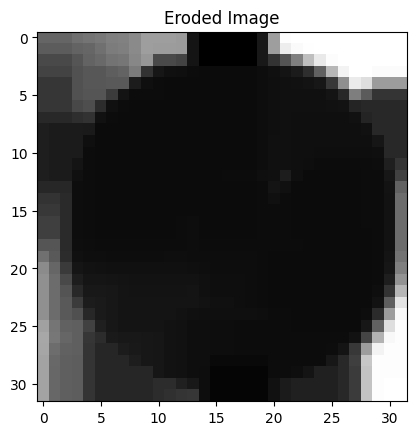

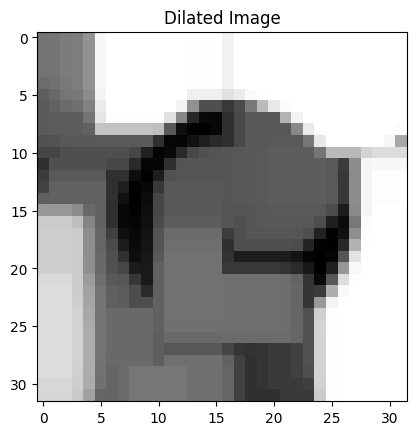

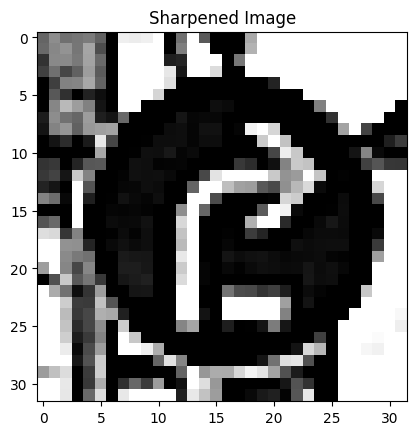

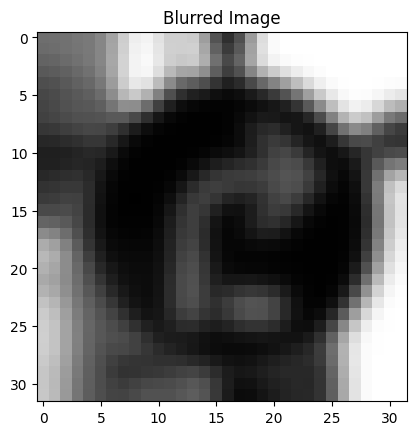

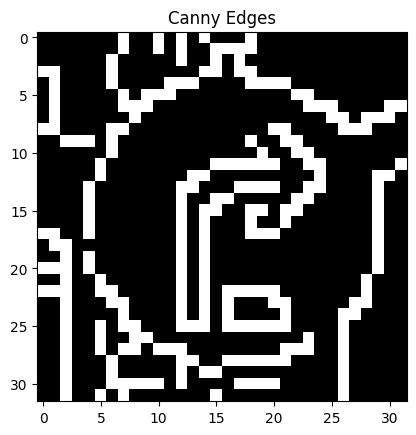

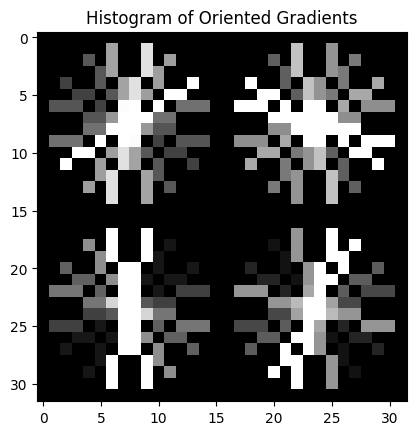

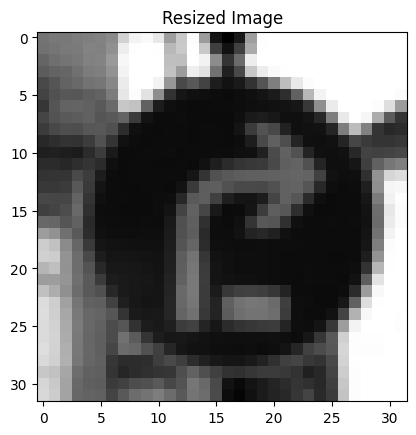

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Assuming X_train_gray and X_train are already defined and loaded

# Convert to uint8
i = 721
X_train_gray_uint8 = cv2.normalize(X_train_gray[i], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Display the original grayscale image
plt.imshow(X_train_gray_uint8.squeeze(), cmap='gray')
plt.title("Original Grayscale Image")
plt.figure()

# Display the corresponding color image
plt.imshow(X_train[i])
plt.title("Original Color Image")
plt.show()

# Image Erosion
kernel = np.ones((5, 5), np.uint8)
eroded = cv2.erode(X_train_gray_uint8, kernel, iterations=1)
plt.imshow(eroded.squeeze(), cmap='gray')
plt.title("Eroded Image")
plt.show()

# Image Dilation
dilated = cv2.dilate(X_train_gray_uint8, kernel, iterations=1)
plt.imshow(dilated.squeeze(), cmap='gray')
plt.title("Dilated Image")
plt.show()

# Image Sharpening
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])
sharpened = cv2.filter2D(X_train_gray_uint8, -1, kernel_sharpening)
plt.imshow(sharpened.squeeze(), cmap='gray')
plt.title("Sharpened Image")
plt.show()

# Gaussian Blurring
blurred = cv2.GaussianBlur(X_train_gray_uint8, (5, 5), 0)
plt.imshow(blurred.squeeze(), cmap='gray')
plt.title("Blurred Image")
plt.show()

# Edge Detection using Canny
edges = cv2.Canny(X_train_gray_uint8, 100, 200)
plt.imshow(edges.squeeze(), cmap='gray')
plt.title("Canny Edges")
plt.show()

# Histogram of Oriented Gradients (HOG)
fd, hog_image = hog(X_train_gray_uint8, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=None)  # Corrected to 'None' for single channel
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

plt.imshow(hog_image_rescaled, cmap='gray')
plt.title("Histogram of Oriented Gradients")
plt.show()

# Image Resizing (resizing is repeated here for complete script context)
resized_image = cv2.resize(X_train_gray_uint8, (32, 32))  # Resize to 32x32
plt.imshow(resized_image.squeeze(), cmap='gray')
plt.title("Resized Image")
plt.show()


Epoch 1/70
70/70 [==============================] - 4s 19ms/step - loss: 2.1190 - accuracy: 0.4563 - val_loss: 4.0494 - val_accuracy: 0.0202
Epoch 2/70
70/70 [==============================] - 1s 15ms/step - loss: 0.4452 - accuracy: 0.8684 - val_loss: 4.6117 - val_accuracy: 0.0268
Epoch 3/70
70/70 [==============================] - 1s 15ms/step - loss: 0.1939 - accuracy: 0.9426 - val_loss: 4.8531 - val_accuracy: 0.0270
Epoch 4/70
70/70 [==============================] - 1s 15ms/step - loss: 0.1177 - accuracy: 0.9665 - val_loss: 4.8337 - val_accuracy: 0.0172
Epoch 5/70
70/70 [==============================] - 1s 15ms/step - loss: 0.0902 - accuracy: 0.9736 - val_loss: 4.3946 - val_accuracy: 0.0510
Epoch 6/70
70/70 [==============================] - 1s 15ms/step - loss: 0.0676 - accuracy: 0.9805 - val_loss: 3.4468 - val_accuracy: 0.1651
Epoch 7/70
70/70 [==============================] - 1s 15ms/step - loss: 0.0524 - accuracy: 0.9844 - val_loss: 1.8074 - val_accuracy: 0.5354
Epoch 8/70
70

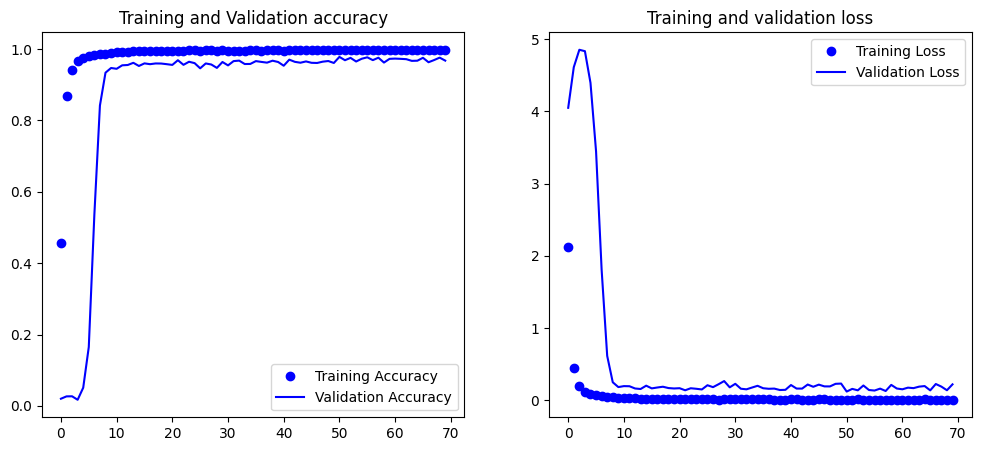

395/395 [==============================] - 1s 2ms/step


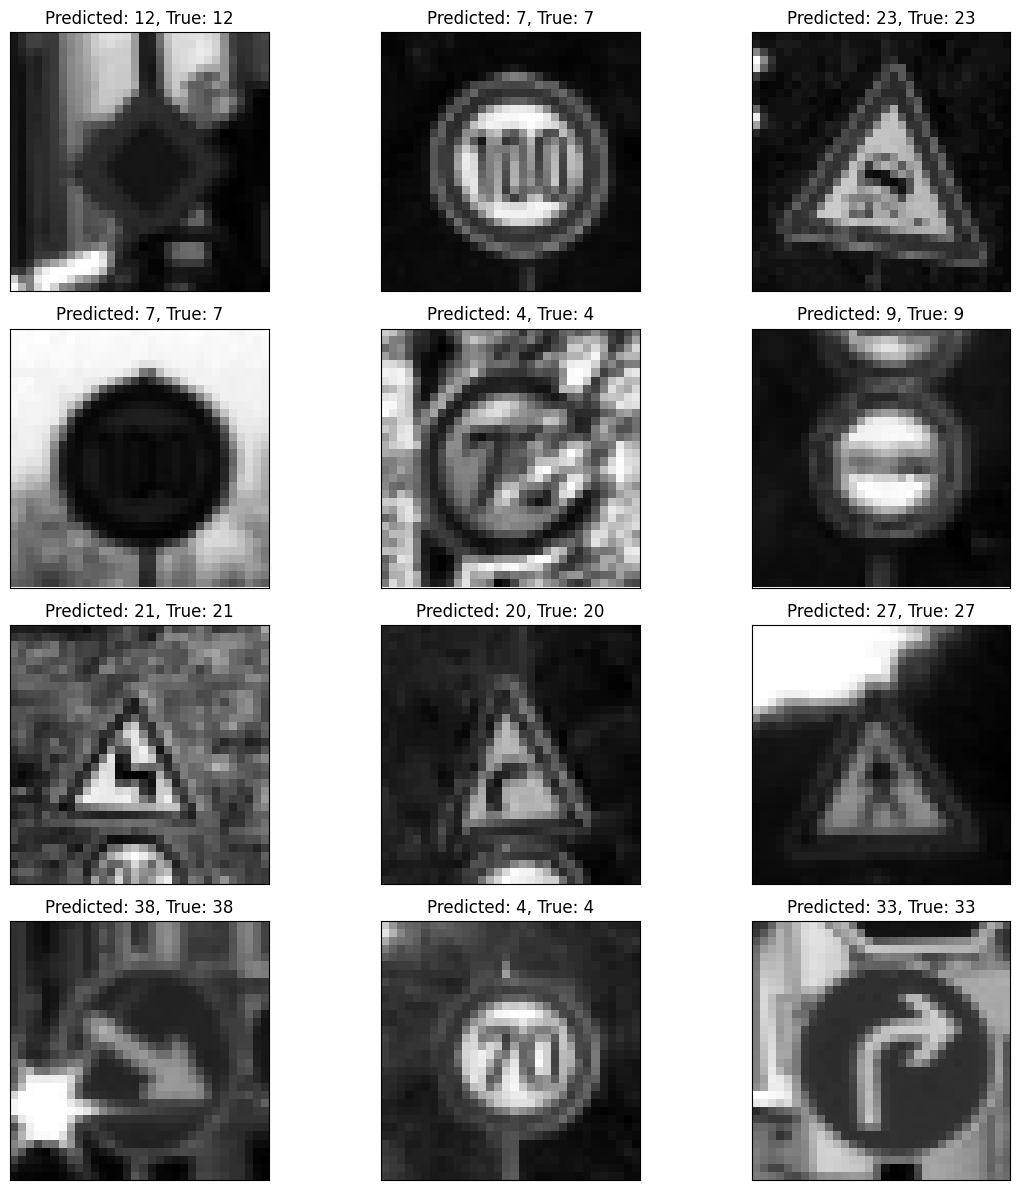

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Assuming X_train_gray, y_train, X_validation_gray_norm, y_validation, X_test_gray_norm, y_test are pre-defined

image_shape = X_train_gray[0].shape  # Corrected index to 0 for generic shape retrieval
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), input_shape=image_shape, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.5))  # Dropout added to avoid overfitting
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(43, activation='softmax'))  # Changed to softmax for multi-class classification

cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=70,
                        verbose=1,
                        validation_data=(X_validation_gray_norm, y_validation))

score = cnn_model.evaluate(X_test_gray_norm, y_test, verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

# Print the model summary
print(cnn_model.summary())

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'bo', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'bo', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Predictions
predict_x = cnn_model.predict(X_test_gray_norm)
predicted_classes = np.argmax(predict_x, axis=1)

# Visualizing some predictions
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_gray_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    ax.set_title("Predicted: {}, True: {}".format(predicted_classes[i+10], y_test[i+10]))
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()


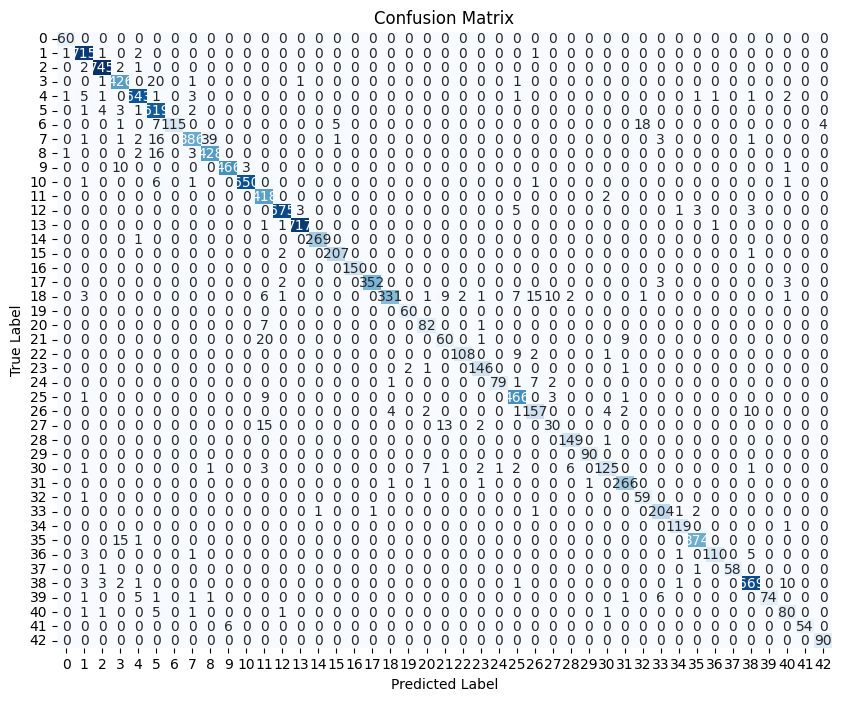

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'predicted_classes' and 'y_test' are already defined as they are the output and true labels from your testing dataset

# Compute the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)  # 'annot=True' to annotate cells with numerical data
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [23]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'predicted_classes' and 'y_test' are already defined as they are the output and true labels from your testing dataset

# Calculate Accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Generate a list of class names based on the number of unique classes
class_names = [f'Class {i+1}' for i in range(len(np.unique(y_test)))]  # Adjust range if class indices start from 0

# Generate a classification report
report = classification_report(y_test, predicted_classes, target_names=class_names, digits=4)
print("Classification Report:\n", report)


Accuracy: 95.65%
Classification Report:
               precision    recall  f1-score   support

     Class 1     0.9524    1.0000    0.9756        60
     Class 2     0.9675    0.9931    0.9801       720
     Class 3     0.9841    0.9933    0.9887       750
     Class 4     0.9261    0.9467    0.9363       450
     Class 5     0.9757    0.9742    0.9750       660
     Class 6     0.8958    0.9825    0.9372       630
     Class 7     1.0000    0.7667    0.8679       150
     Class 8     0.9674    0.8578    0.9093       450
     Class 9     0.9126    0.9511    0.9314       450
    Class 10     0.9873    0.9708    0.9790       480
    Class 11     0.9954    0.9848    0.9901       660
    Class 12     0.8727    0.9952    0.9299       420
    Class 13     0.9897    0.9783    0.9840       690
    Class 14     0.9945    0.9958    0.9951       720
    Class 15     0.9963    0.9963    0.9963       270
    Class 16     0.9718    0.9857    0.9787       210
    Class 17     1.0000    1.0000    1.0